In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [4]:
reeses = cv2.imread('Computer-Vision-with-Python/DATA/reeses_puffs.png',0)

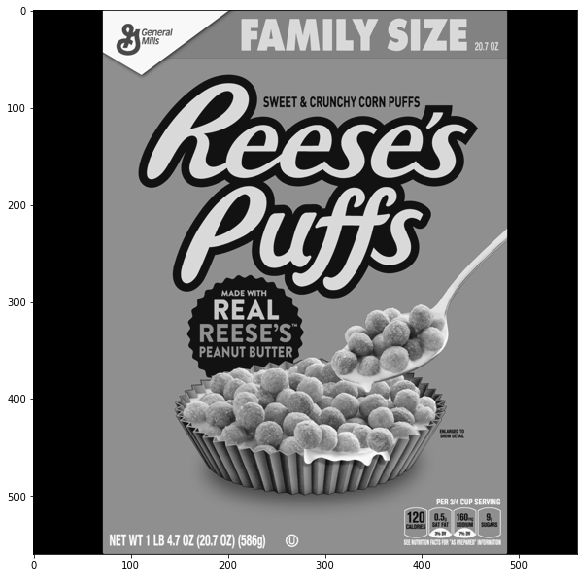

In [5]:
display(reeses)

In [6]:
cereals = cv2.imread('Computer-Vision-with-Python/DATA/many_cereals.jpg',0)

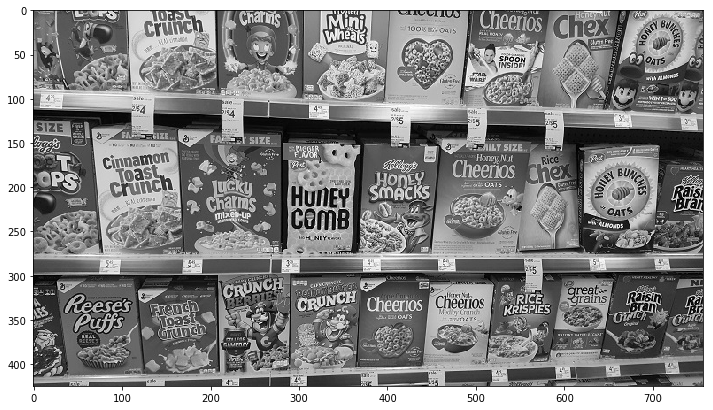

In [7]:
display(cereals)

In [8]:
orb = cv2.ORB_create()

In [9]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [10]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [14]:
matches = bf.match(des1,des2)

In [15]:
single_match = matches[0]

In [16]:
single_match.distance

78.0

In [13]:
matches = sorted(matches,key=lambda x:x.distance)

In [19]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

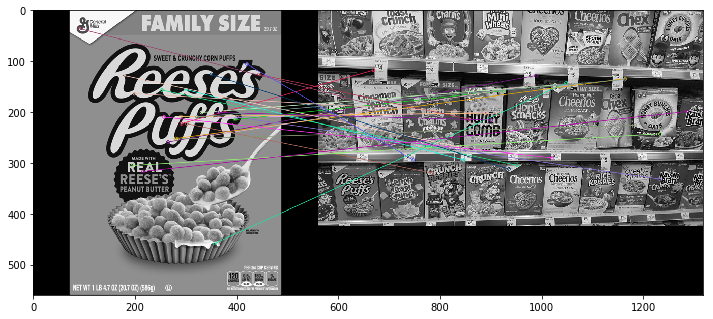

In [20]:
display(reeses_matches)

In [21]:
sift = cv2.xfeatures2d.SIFT_create()

In [22]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [23]:
bf = cv2.BFMatcher()

In [24]:
matches = bf.knnMatch(des1,des2,k=2)

In [26]:
good=[]

#less distance == better match
#ratio test < 75% match 2
for match1,match2 in matches:
    #if match 1 siatance is less than 75% of match 2 distance
    #then description was a good match, lets keep it
    if match1.distance<0.75*match2.distance:
        good.append([match1])
        

In [28]:
len(good)

78

In [29]:
len(matches)

1500

In [30]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

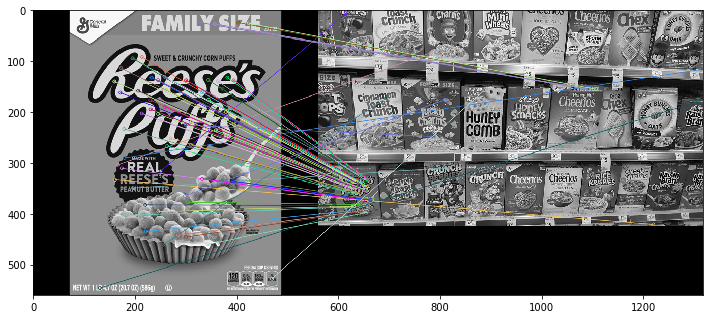

In [31]:
display(sift_matches)

In [50]:
sift = cv2.xfeatures2d.SIFT_create()

In [51]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [52]:
#FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [53]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [54]:
matches = flann.knnMatch(des1,des2,k=2)

In [55]:
matchesMask=[[0,0] for i in range(len(matches))]

In [57]:
#matchesMask

In [58]:

for i,(match1,match2) in enumerate(matches):
    if match2.distance<0.7*match2.distance:
        matchesMask[1]=[1,0]

In [59]:
draw_params = dict(matchColor=(0,255,0),singlePointColor=(255,0,0),matchesMask=matchesMask,flags=0)

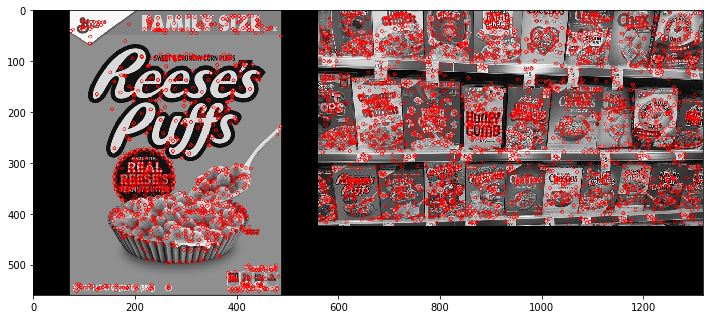

In [61]:
flann_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display(flann_matches)